# Customer Behavior Analysis and Churn Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\Sneha\OneDrive\Desktop\VS CODE\Data Analyst\Python\Telco Customer Churn EDA Projaect\telco.csv")
df

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Female,30,No,No,No,No,0,United States,California,...,0,1639.44,3039.53,5,Stayed,No,45,5306,NaN,NaN
7039,6840-RESVB,Male,38,No,No,Yes,Yes,2,United States,California,...,0,865.20,2807.47,3,Stayed,No,59,2140,NaN,NaN
7040,2234-XADUH,Female,30,No,No,Yes,Yes,2,United States,California,...,0,2135.52,9453.04,4,Stayed,No,71,5560,NaN,NaN
7041,4801-JZAZL,Female,32,No,No,Yes,Yes,2,United States,California,...,0,0.00,319.21,4,Stayed,No,59,2793,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

#replacing blanks with 0 as tenure the is 0 and no total charge are recorded. also changed data type of total charges from object to float  

In [5]:
df["Total Charges"] = df["Total Charges"].replace(" ","0")
df["Total Charges"] = df["Total Charges"].astype("float")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

In [7]:
df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Country                                 0
State                                   0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Population                              0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                  

In [8]:
df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Score,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,3.244924,58.505040,4400.295755
std,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,1.201657,21.170031,1183.057152
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,1.000000,5.000000,2003.000000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000,3.000000,40.000000,3469.000000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,3.000000,61.000000,4527.000000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,4.000000,75.500000,5380.500000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,5.000000,96.000000,6500.000000


In [9]:
df.duplicated().sum()

0

In [10]:
df["Customer ID"].duplicated().sum()

0

#converted 0 and 1 values of senior citizen to yes/no to make it easior to understand

In [11]:
df.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


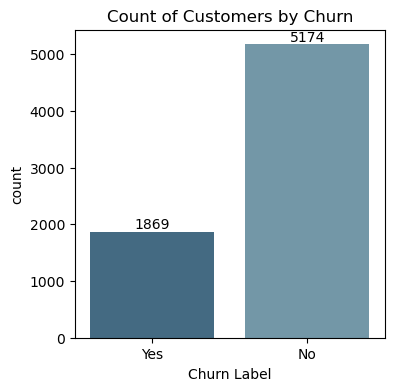

In [18]:
plt.figure(figsize= (4,4))

ax = sns.countplot(x='Churn Label', data=df,hue = 'Churn Label', palette=['#3A6D8C', '#6A9AB0'])

for container in ax.containers:
    
    ax.bar_label(container)
    
plt.title("Count of Customers by Churn")

plt.show()

In [19]:
gb = df.groupby("Churn Label").agg({'Churn Label':"count"})
gb

,Churn Label
Churn Label,
No,5174
Yes,1869


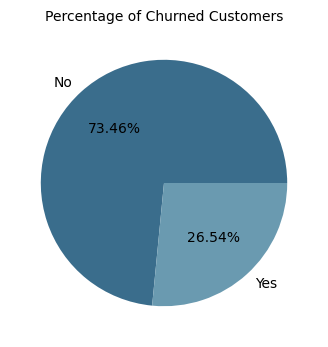

In [20]:
plt.figure(figsize = (4,4))

gb = df.groupby("Churn Label").agg({'Churn Label':"count"})

plt.pie(gb['Churn Label'], labels=gb.index, autopct="%1.2f%%", colors=['#3A6D8C', '#6A9AB0'])

plt.title("Percentage of Churned Customers", fontsize = 10)

plt.show()

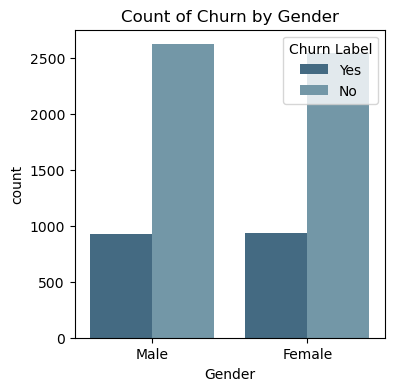

In [21]:
plt.figure(figsize = (4,4))

sns.countplot(x="Gender", data = df, hue = 'Churn Label',palette=['#3A6D8C', '#6A9AB0'])

plt.title("Count of Churn by Gender")

plt.show()

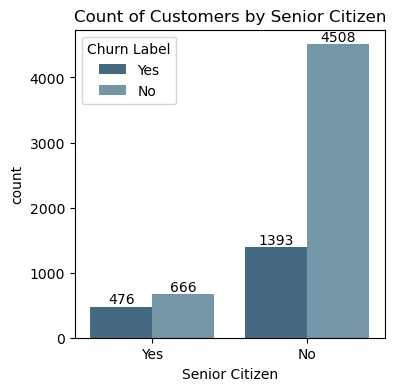

In [22]:
plt.figure(figsize = (4,4))

ax = sns.countplot(x="Senior Citizen", data=df, hue="Churn Label", palette=['#3A6D8C', '#6A9AB0'])

for container in ax.containers:
    ax.bar_label(container)
    
plt.title("Count of Customers by Senior Citizen")
plt.show()

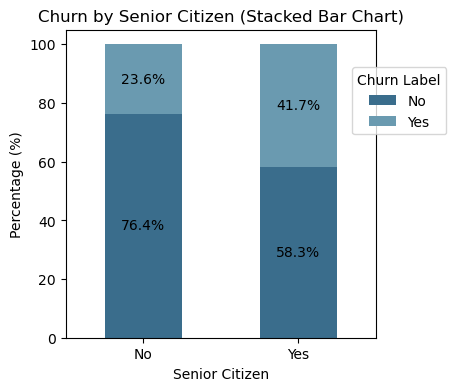

In [23]:
total_counts = df.groupby('Senior Citizen')['Churn Label'].value_counts(normalize=True).unstack() * 100


fig, ax = plt.subplots(figsize=(4, 4)) 


total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#3A6D8C', '#6A9AB0'])  


for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.title('Churn by Senior Citizen (Stacked Bar Chart)')
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn Label', bbox_to_anchor = (0.9,0.9))  

plt.show()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

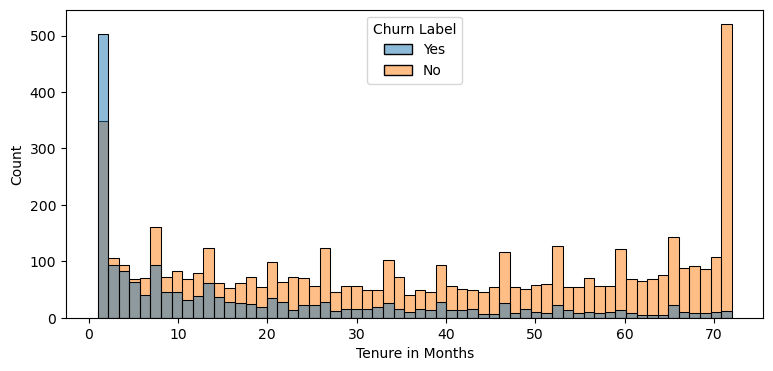

In [25]:
plt.figure(figsize=(9,4))
sns.histplot(x ="Tenure in Months", data=df, bins = 60, hue = 'Churn Label')
plt.show()

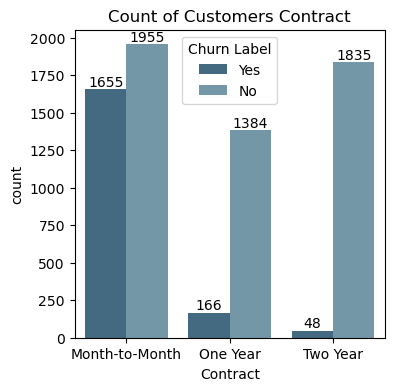

In [26]:
plt.figure(figsize = (4,4))

ax = sns.countplot(x="Contract", data=df, hue="Churn Label", palette=['#3A6D8C', '#6A9AB0'])

for container in ax.containers:
    ax.bar_label(container)
    
plt.title("Count of Customers Contract")
plt.show()

In [27]:
df.columns.values

array(['Customer ID', 'Gender', 'Age', 'Under 30', 'Senior Citizen',
       'Married', 'Dependents', 'Number of Dependents', 'Country',
       'State', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Population',
       'Quarter', 'Referred a Friend', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Monthly Charge',
       'Total Charges', 'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue',
       'Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason'],
      dtype=object)

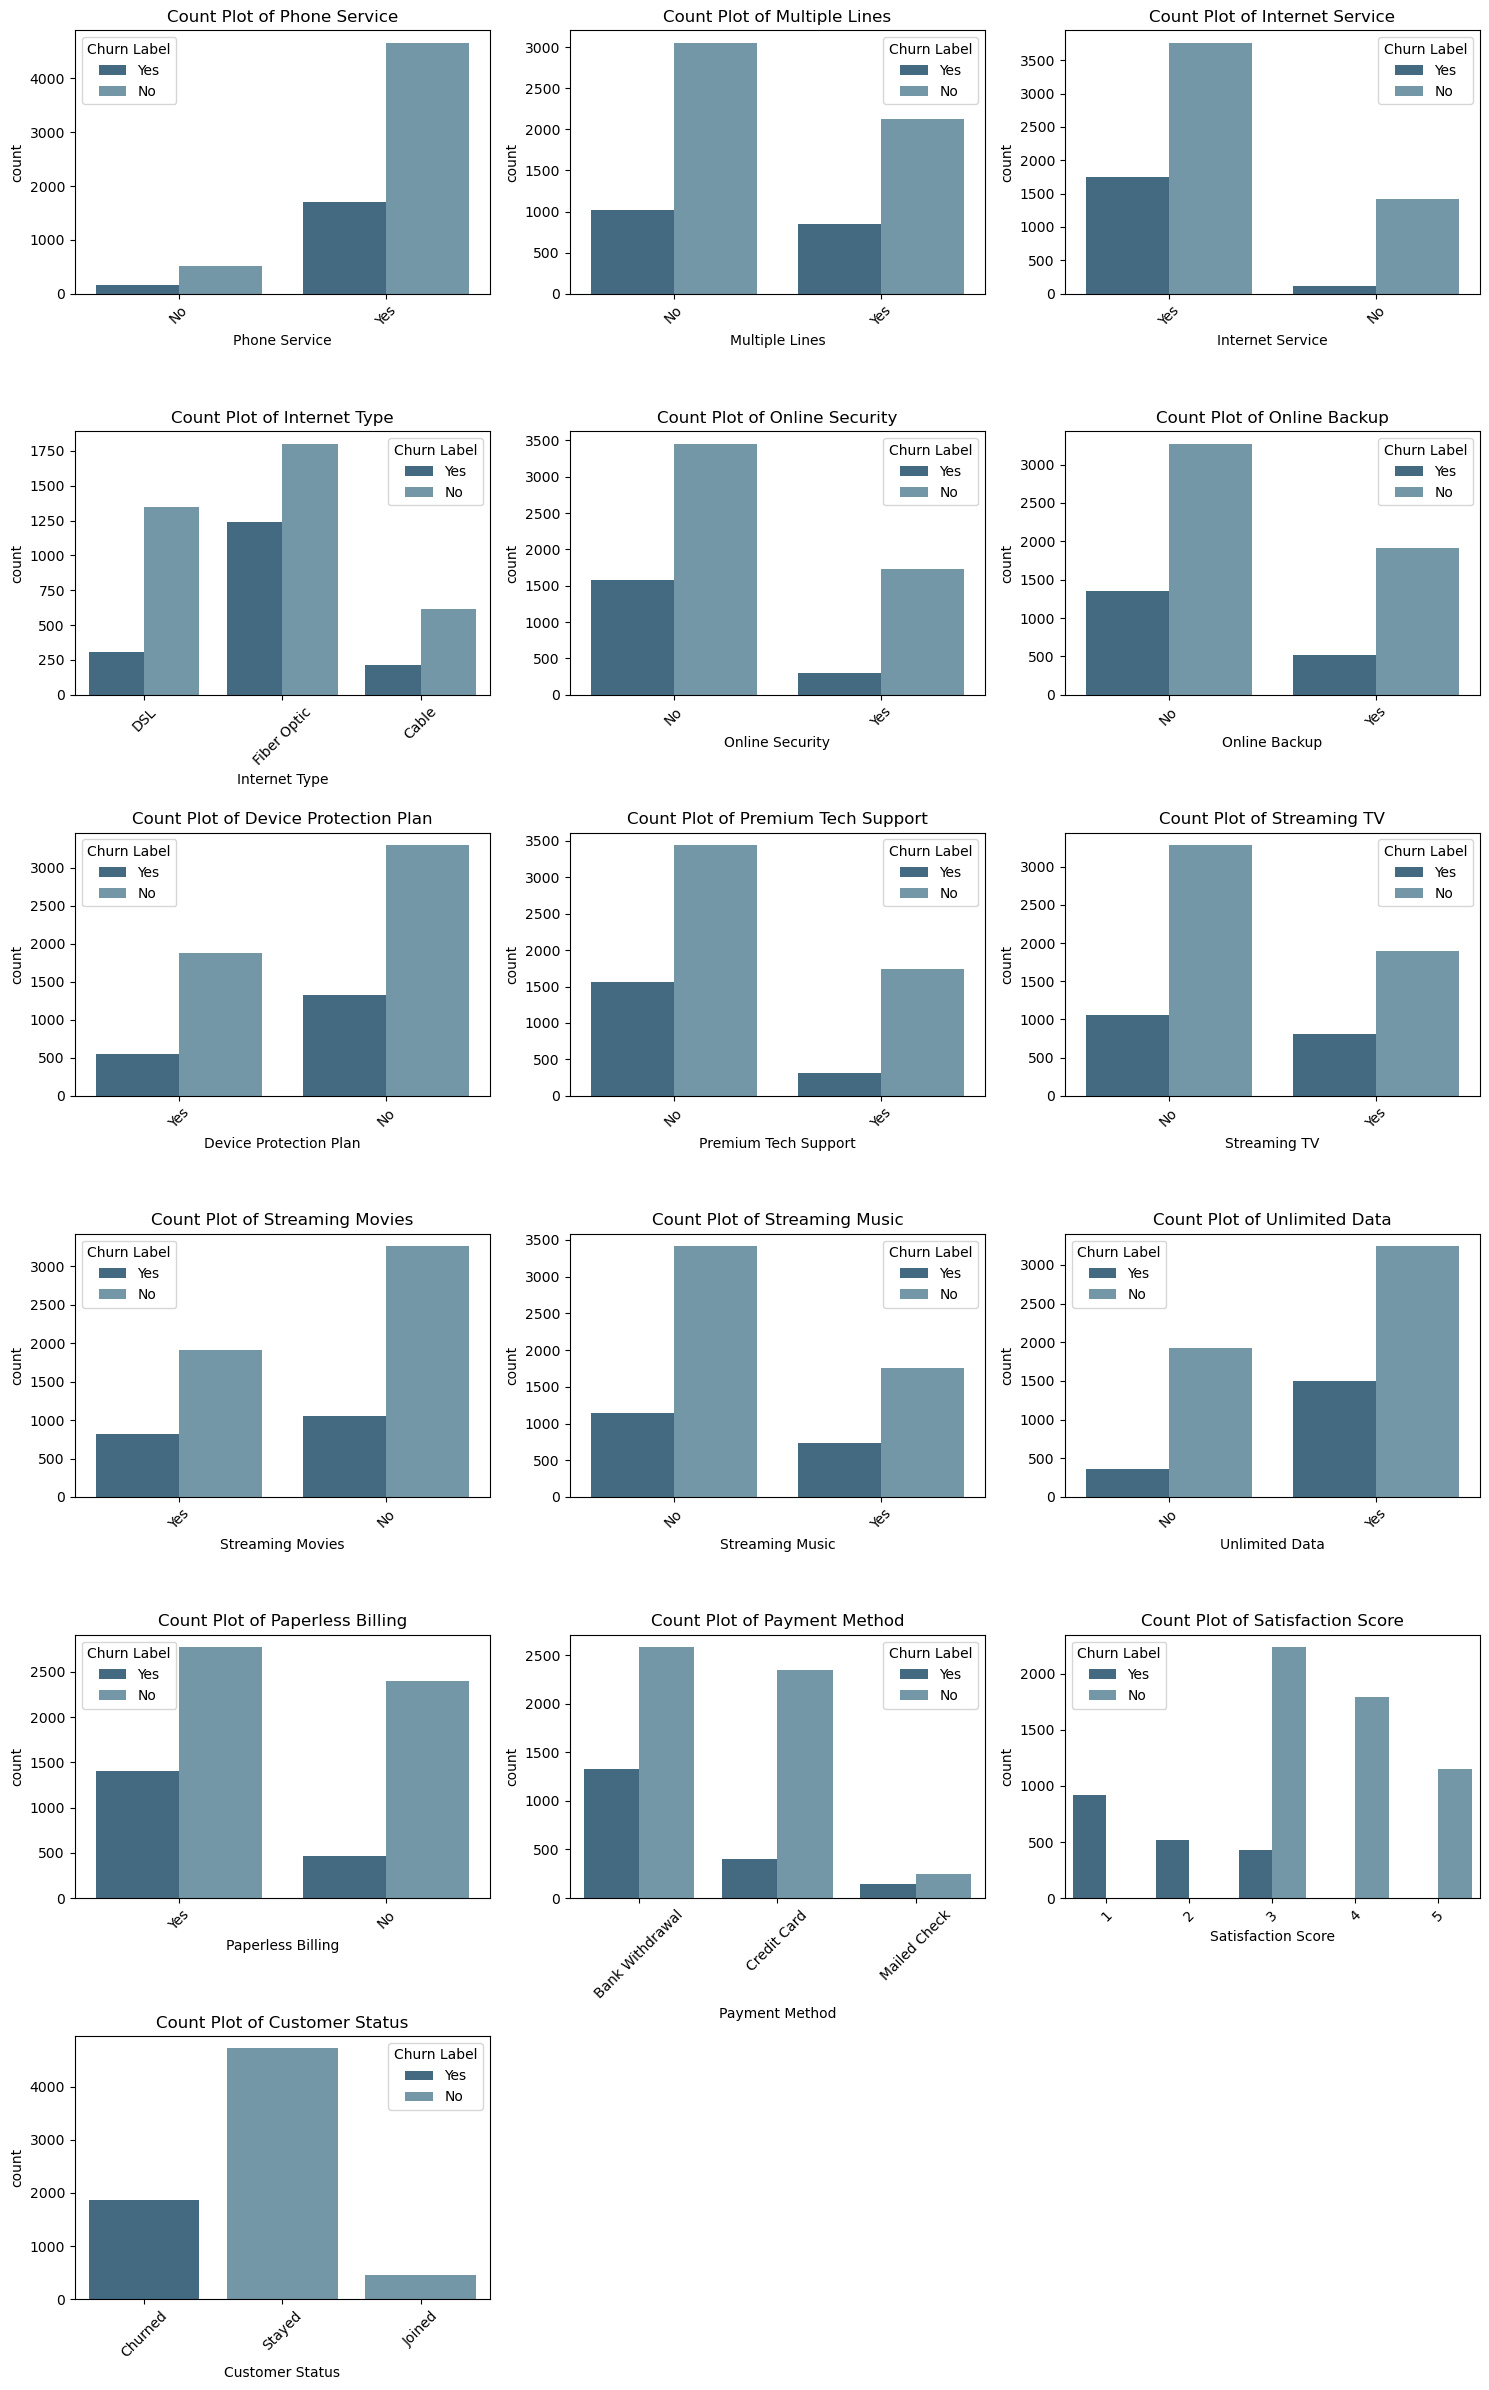

In [28]:
columns = ['Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 
            'Online Security', 'Online Backup', 
           'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 
           'Streaming Movies', 'Streaming Music', 'Unlimited Data', 
           'Paperless Billing', 'Payment Method', 'Satisfaction Score', 
           'Customer Status']


n_cols = 3  
n_rows = (len(columns) + n_cols - 1) // n_cols  


fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  
axes = axes.flatten()  


for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, ax=axes[i], hue='Churn Label',palette=['#3A6D8C', '#6A9AB0'])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].tick_params(axis='x', rotation=45)  


for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()  
plt.show()


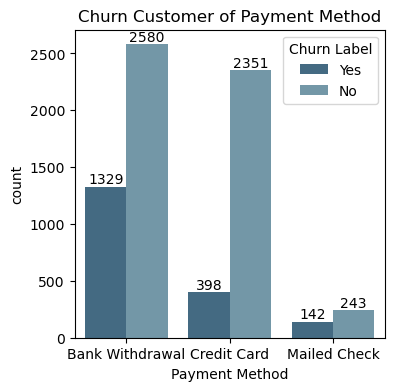

In [29]:
plt.figure(figsize = (4,4))

ax = sns.countplot(x="Payment Method", data=df, hue="Churn Label", palette=['#3A6D8C', '#6A9AB0'])

for container in ax.containers:
    ax.bar_label(container)
    
plt.title("Churn Customer of Payment Method")
plt.show()

In [30]:
correlation = df[['Age', 'Monthly Charge']].corr().iloc[0, 1]
print(f'Correlation between Age and Monthly Charge: {correlation:.2f}')

Correlation between Age and Monthly Charge: 0.14


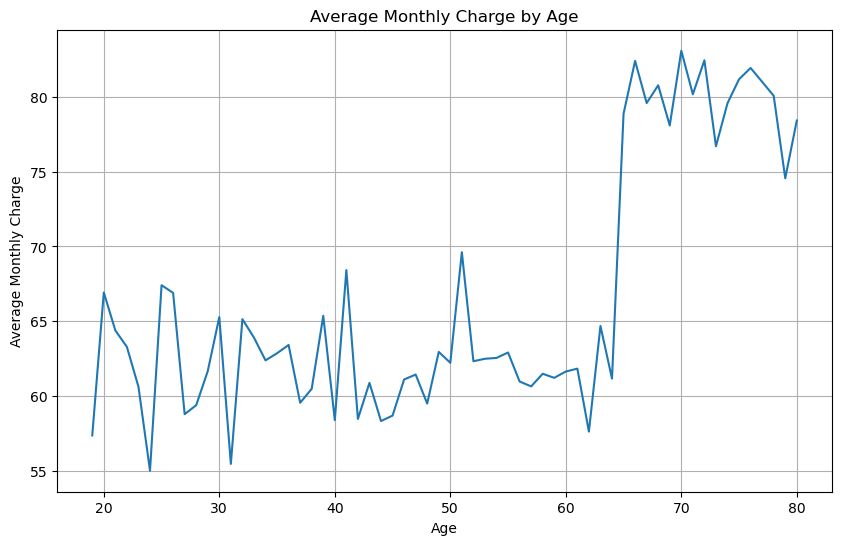

In [31]:
plt.figure(figsize=(10, 6))
df.groupby('Age')['Monthly Charge'].mean().plot(kind='line')
plt.title('Average Monthly Charge by Age')
plt.xlabel('Age')
plt.ylabel('Average Monthly Charge')
plt.grid(True)
plt.show()

In [32]:
df['Online Security'] = df['Online Security'].map({'Yes': 1, 'No': 0})
df['Device Protection Plan'] = df['Device Protection Plan'].map({'Yes': 1, 'No': 0})
df['Premium Tech Support'] = df['Premium Tech Support'].map({'Yes': 1, 'No': 0})

In [33]:
selected_columns = ['Online Security', 'Device Protection Plan', 'Premium Tech Support', 'Satisfaction Score']

correlation_matrix = df[selected_columns].corr()

print(correlation_matrix)

                        Online Security  Device Protection Plan  \
Online Security                1.000000                0.275438   
Device Protection Plan         0.275438                1.000000   
Premium Tech Support           0.354931                0.333313   
Satisfaction Score            -0.093158               -0.000549   

                        Premium Tech Support  Satisfaction Score  
Online Security                     0.354931           -0.093158  
Device Protection Plan              0.333313           -0.000549  
Premium Tech Support                1.000000            0.050086  
Satisfaction Score                  0.050086            1.000000  


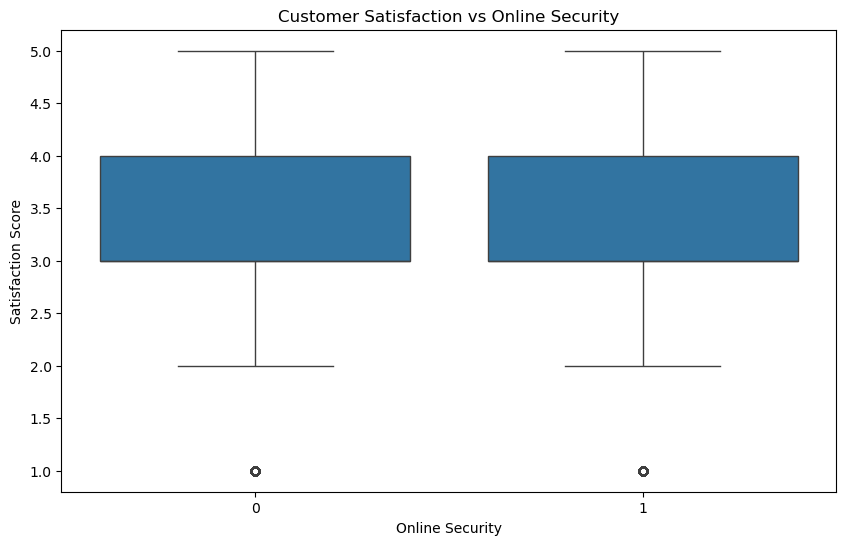

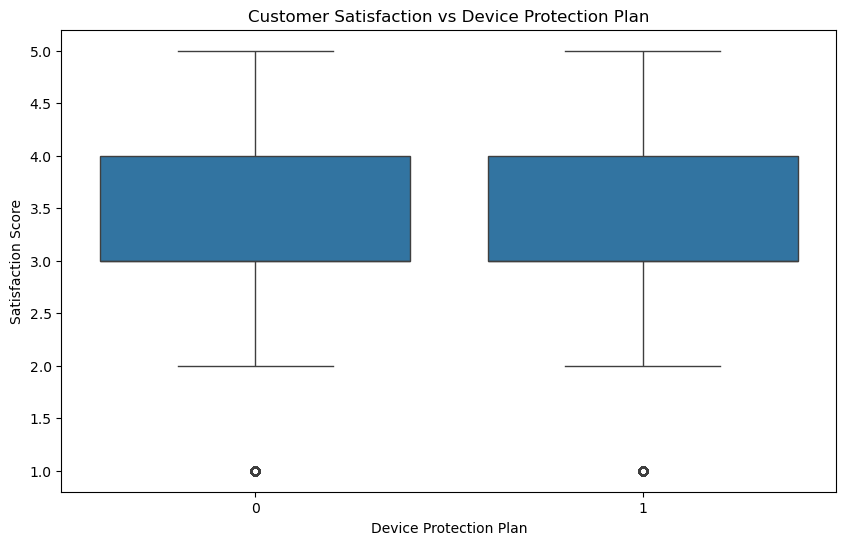

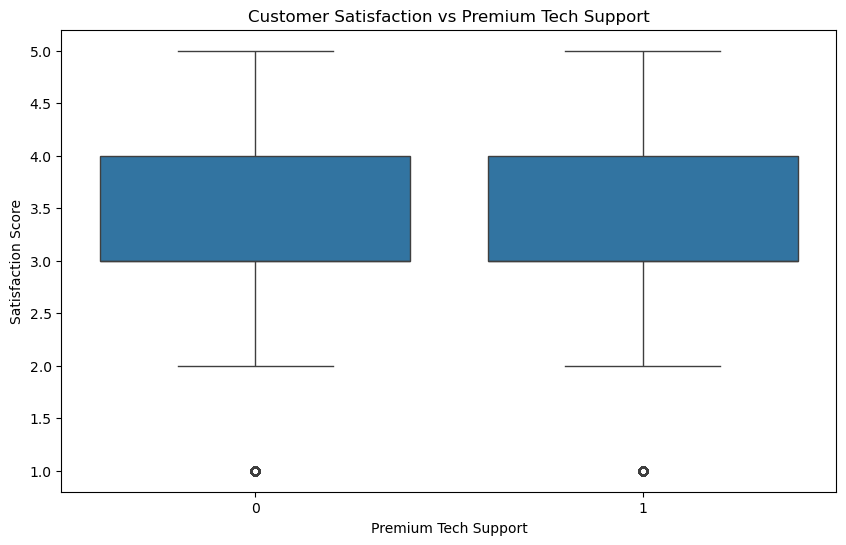

In [34]:
# Box plot for Online Security vs Satisfaction Score
plt.figure(figsize=(10, 6))
sns.boxplot(x='Online Security', y='Satisfaction Score', data=df)
plt.title('Customer Satisfaction vs Online Security')
plt.show()

# Box plot for Device Protection Plan vs Satisfaction Score
plt.figure(figsize=(10, 6))
sns.boxplot(x='Device Protection Plan', y='Satisfaction Score', data=df)
plt.title('Customer Satisfaction vs Device Protection Plan')
plt.show()

# Box plot for Premium Tech Support vs Satisfaction Score
plt.figure(figsize=(10, 6))
sns.boxplot(x='Premium Tech Support', y='Satisfaction Score', data=df)
plt.title('Customer Satisfaction vs Premium Tech Support')
plt.show()


In [35]:
df['Churn Label'] = df['Churn Label'].map({'Yes': 1, 'No': 0})

In [36]:
country_churn = df.groupby('Country')['Churn Label'].mean()
state_churn = df.groupby('State')['Churn Label'].mean()
city_churn = df.groupby('City')['Churn Label'].mean()

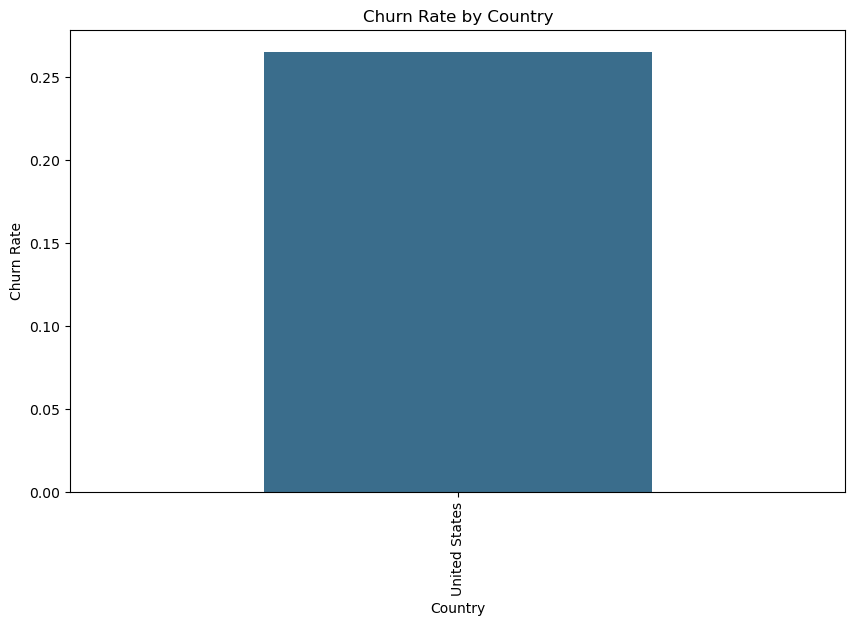

In [37]:
plt.figure(figsize=(10, 6))
country_churn.plot(kind='bar', color='#3A6D8C')
plt.title('Churn Rate by Country')
plt.xlabel('Country')
plt.ylabel('Churn Rate')
plt.show()

In [38]:
marital_dependents = df.groupby('Married')['Number of Dependents'].mean()

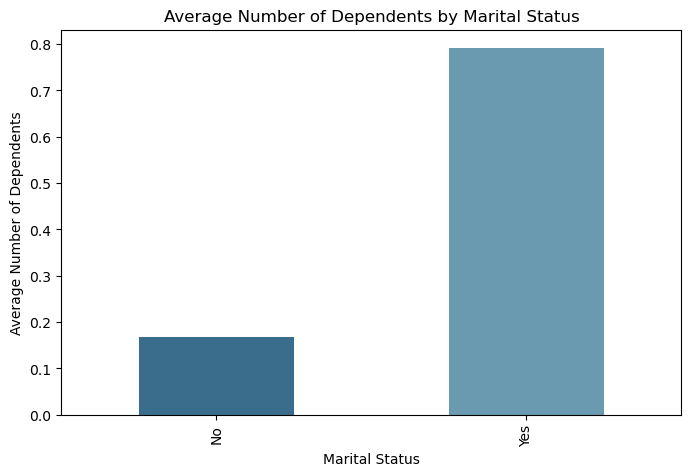

In [39]:
plt.figure(figsize=(8, 5))
marital_dependents.plot(kind='bar', color=['#3A6D8C', '#6A9AB0'])
plt.title('Average Number of Dependents by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Number of Dependents')
plt.show()

In [40]:
correlation_total_monthly = df[['Total Charges', 'Monthly Charge']].corr()

print(correlation_total_monthly)

                Total Charges  Monthly Charge
Total Charges        1.000000        0.651236
Monthly Charge       0.651236        1.000000


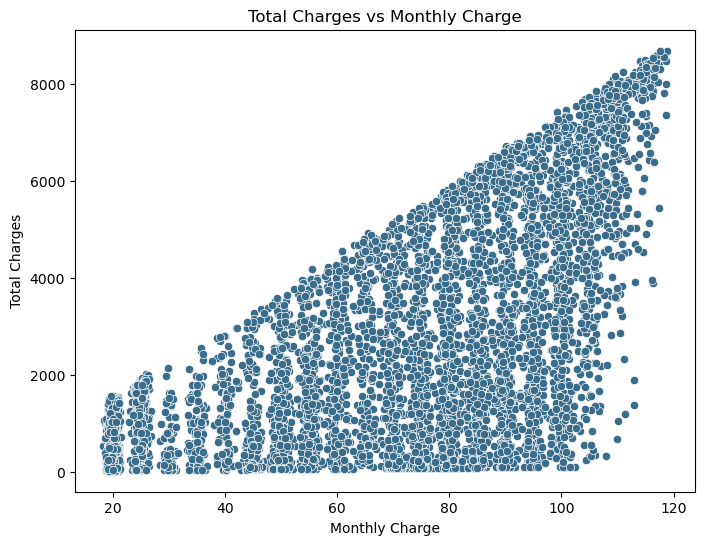

In [41]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Monthly Charge', y='Total Charges', data=df, color='#3A6D8C')
plt.title('Total Charges vs Monthly Charge')
plt.xlabel('Monthly Charge')
plt.ylabel('Total Charges')
plt.show()

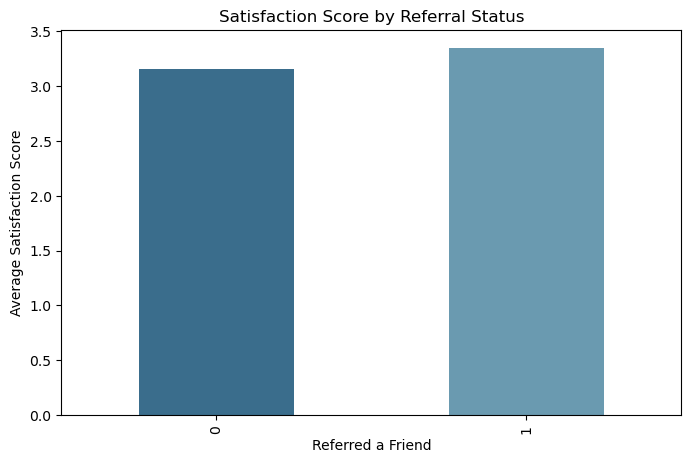

                    Referred a Friend  Satisfaction Score
Referred a Friend            1.000000            0.077764
Satisfaction Score           0.077764            1.000000


In [42]:
df['Referred a Friend'] = df['Referred a Friend'].map({'Yes': 1, 'No': 0})

referral_satisfaction = df.groupby('Referred a Friend')['Satisfaction Score'].mean()

plt.figure(figsize=(8, 5))
referral_satisfaction.plot(kind='bar', color=['#3A6D8C', '#6A9AB0'])
plt.title('Satisfaction Score by Referral Status')
plt.xlabel('Referred a Friend')
plt.ylabel('Average Satisfaction Score')
plt.show()

print(df[['Referred a Friend', 'Satisfaction Score']].corr())

<Figure size 800x500 with 0 Axes>

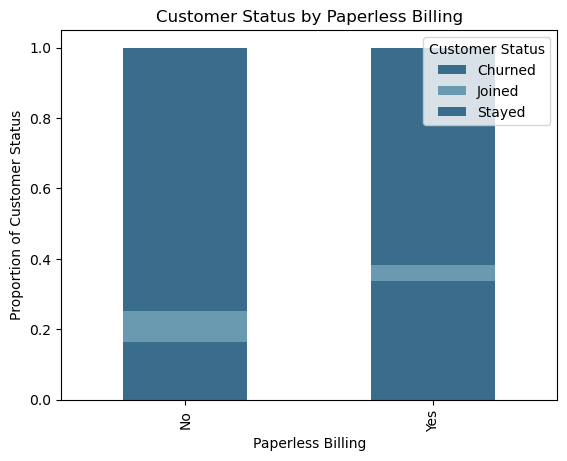

In [43]:
paperless_status = df.groupby('Paperless Billing')['Customer Status'].value_counts(normalize=True).unstack()

plt.figure(figsize=(8, 5))
paperless_status.plot(kind='bar', stacked=True, color=['#3A6D8C', '#6A9AB0'])
plt.title('Customer Status by Paperless Billing')
plt.xlabel('Paperless Billing')
plt.ylabel('Proportion of Customer Status')
plt.show()

In [44]:
df['Streaming TV'] = df['Streaming TV'].map({'Yes': 1, 'No': 0})
df['Streaming Movies'] = df['Streaming Movies'].map({'Yes': 1, 'No': 0})
df['Streaming Music'] = df['Streaming Music'].map({'Yes': 1, 'No': 0})

In [45]:
df['Total Streaming Services'] = df[['Streaming TV', 'Streaming Movies', 'Streaming Music']].sum(axis=1)

In [46]:
correlation_streaming_churn = df[['Total Streaming Services', 'Churn Label']].corr()

In [47]:
print(correlation_streaming_churn)

                          Total Streaming Services  Churn Label
Total Streaming Services                   1.00000      0.06597
Churn Label                                0.06597      1.00000


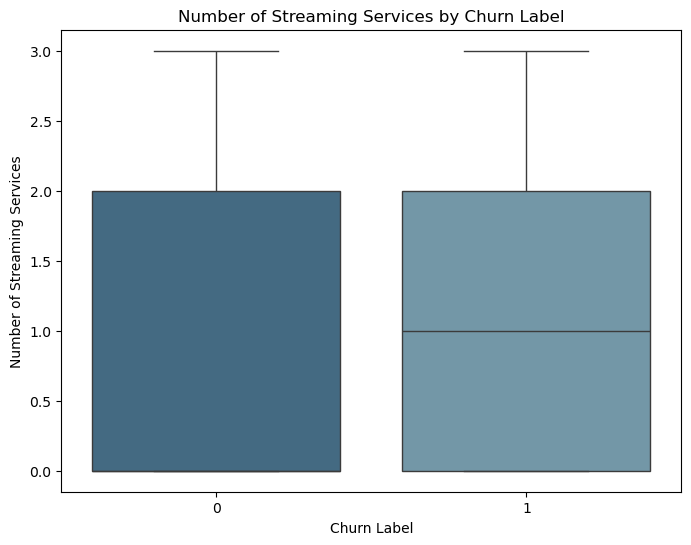

In [48]:
plt.figure(figsize=(8, 6))

sns.boxplot(x='Churn Label', y='Total Streaming Services', data=df, hue='Churn Label', palette=['#3A6D8C', '#6A9AB0'], legend=False)

plt.title('Number of Streaming Services by Churn Label')
plt.xlabel('Churn Label')
plt.ylabel('Number of Streaming Services')
plt.show()

In [49]:
df['Unlimited Data'] = df['Unlimited Data'].map({'Yes': 1, 'No': 0})

correlation_unlimited_satisfaction = df[['Unlimited Data', 'Satisfaction Score']].corr()

print(correlation_unlimited_satisfaction)

                    Unlimited Data  Satisfaction Score
Unlimited Data            1.000000           -0.210489
Satisfaction Score       -0.210489            1.000000


In [50]:
correlation_unlimited_churn = df[['Unlimited Data', 'Churn Label']].corr()

In [51]:
print(correlation_unlimited_satisfaction)
print(correlation_unlimited_churn)

                    Unlimited Data  Satisfaction Score
Unlimited Data            1.000000           -0.210489
Satisfaction Score       -0.210489            1.000000
                Unlimited Data  Churn Label
Unlimited Data        1.000000     0.166545
Churn Label           0.166545     1.000000


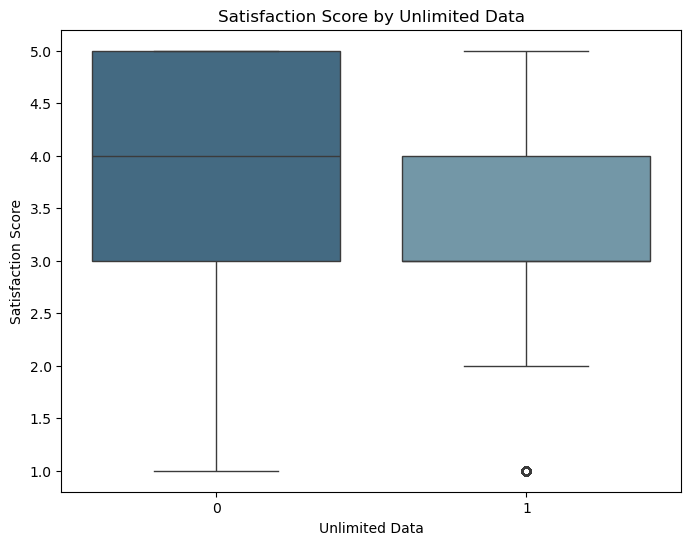

In [52]:
plt.figure(figsize=(8, 6))

sns.boxplot(x='Unlimited Data', y='Satisfaction Score', data=df, hue='Unlimited Data', palette=['#3A6D8C', '#6A9AB0'], legend=False)

plt.title('Satisfaction Score by Unlimited Data')
plt.xlabel('Unlimited Data')
plt.ylabel('Satisfaction Score')
plt.show()